In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = r'C:\Users\user\Desktop\Data_Analyst\TDN_Network\Brand_Team_Response_From_Stephen\TDN Brand Team (Responses).xlsx'
df = pd.read_excel(file_path)

In [4]:
df.head()

,Timestamp,Email Address,Full Name,Please send a cute photo of you. :),Email Address.1,Phone Number,In which field are you currently working?,What are your Hard skills?,What are your Soft skills?,Briefly describe your experience using the skills mentioned above.,How do you think your skills align with our vision and mission?,"What is your proficiency in your field of work? ( Skills, Effectiveness, knowledge of necessary software)",How much do you charge for your services or as a product owner how much are you looking to raise?
0,2023-08-28 22:00:52.767,office@tec-one.coach,Prof. Dr. Werner Korb,NaN,office@tec-one.coach,+591 63 56 1400,Advisor/Advisory Board Member,NaN,NaN,"University Professor, Startup Founder, Innovat...",I have innovation in my blood :-),NaN,NaN
1,2023-08-28 22:45:51.889,emmanueletuwe33@gmail.com,Emmanuel Etuwe,NaN,emmanueletuwe33@gmail.com,+2348107933013,UX/UI Designer,NaN,NaN,I'm a certified UIUX designer and have experie...,I believe that building a sustainable tech-bas...,NaN,NaN
2,2023-08-28 22:52:49.894,favourekeleme58@gmail.com,Favour EKELEME,NaN,favourekeleme58@gmail.com,+2348146581904,Community DevRel,NaN,NaN,I am capable of building active communities an...,I would be a bridge between the builders and t...,NaN,NaN
3,2023-08-29 00:12:19.264,schwizjosh@gmail.com,Anabuike Chibuike Joshua,NaN,Schwizjosh@gmail.com,2347069719374,AI Specialist,NaN,NaN,GPT prompt engineering. Can deploy WhatsApp bo...,Helping the DAO network stay on top of GPT rev...,NaN,NaN
4,2023-09-25 12:47:07.478,fisayooladele62@gmail.com,Fisayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 13 columns):
 #   Column                                                                                                     Non-Null Count  Dtype         
---  ------                                                                                                     --------------  -----         
 0   Timestamp                                                                                                  91 non-null     datetime64[ns]
 1   Email Address                                                                                              91 non-null     object        
 2   Full Name                                                                                                  91 non-null     object        
 3   Please send a cute photo of you. :)                                                                        70 non-null     object        
 4   Email Address.1                   

In [6]:
df.describe()

,Timestamp
count,91
mean,2024-10-17 12:46:04.271747328
min,2023-08-28 22:00:52.767000
25%,2024-10-23 11:45:53.198500096
50%,2024-12-04 13:22:14.881999872
75%,2025-01-28 08:31:34.895000064
max,2025-03-28 14:54:30.481000


In [7]:
# 1. Rename columns for easier reference
df.columns = [
    "Timestamp", "Email", "Full_Name", "Photo_Link", "Email_Alt", "Phone",
    "Field", "Hard_Skills", "Soft_Skills", "Experience", "Alignment",
    "Proficiency", "Rate_Or_Funding"
]

# 2. Drop duplicate or unnecessary columns
df = df.drop(columns=["Email_Alt", "Photo_Link"])

# 3. Remove rows missing core identifiers
df = df.dropna(subset=["Email", "Full_Name"])

# 4. Clean email addresses
df["Email"] = df["Email"].str.strip().str.lower()

# 5. Standardize text columns
text_cols = ["Field", "Hard_Skills", "Soft_Skills", "Experience", "Alignment", "Proficiency"]
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

# 6. Replace string 'nan' and fill actual NaNs
default_values = {
    "Hard_Skills": "No hard skills",
    "Soft_Skills": "No soft skills",
    "Experience": "No experience",
    "Proficiency": "No proficiency",
    "Rate_Or_Funding": "Not provided"
}
for col, default in default_values.items():
    df[col] = df[col].replace("nan", np.nan).fillna(default)

# 7. Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

# 8. Extract Date and Time columns
df["Date"] = df["Timestamp"].dt.date
df["Time"] = df["Timestamp"].dt.time

# 9. Filter out responses with too many nulls (optional threshold = at least 8 non-nulls)
df = df[df.notna().sum(axis=1) >= 8]

# 10. Drop Timestamp column if no longer needed
df = df.drop(columns=["Timestamp"])

# 11. Save cleaned dataset
df.to_excel("TDN_Brand_Team_Cleaned.xlsx", index=False)

print("✅ Cleaning complete. File saved as 'TDN_Brand_Team_Cleaned.xlsx'")

df_brand = df.copy()


✅ Cleaning complete. File saved as 'TDN_Brand_Team_Cleaned.xlsx'


In [8]:
df_brand['Time'] = df_brand['Time'].apply(lambda t: t.strftime('%H:%M:%S') if pd.notnull(t) else t)
df_brand = df_brand.drop(index=4).reset_index(drop=True)

df_brand.head()

,Email,Full_Name,Phone,Field,Hard_Skills,Soft_Skills,Experience,Alignment,Proficiency,Rate_Or_Funding,Date,Time
0,office@tec-one.coach,Prof. Dr. Werner Korb,+591 63 56 1400,Advisor/Advisory Board Member,No hard skills,No soft skills,"University Professor, Startup Founder, Innovat...",I have innovation in my blood :-),No proficiency,Not provided,2023-08-28,22:00:52
1,emmanueletuwe33@gmail.com,Emmanuel Etuwe,+2348107933013,UX/UI Designer,No hard skills,No soft skills,I'm a certified UIUX designer and have experie...,I believe that building a sustainable tech-bas...,No proficiency,Not provided,2023-08-28,22:45:51
2,favourekeleme58@gmail.com,Favour EKELEME,+2348146581904,Community DevRel,No hard skills,No soft skills,I am capable of building active communities an...,I would be a bridge between the builders and t...,No proficiency,Not provided,2023-08-28,22:52:49
3,schwizjosh@gmail.com,Anabuike Chibuike Joshua,2347069719374,AI Specialist,No hard skills,No soft skills,GPT prompt engineering. Can deploy WhatsApp bo...,Helping the DAO network stay on top of GPT rev...,No proficiency,Not provided,2023-08-29,00:12:19
4,smilewithcynthia@gmail.con,Cynthia Osi,0704 290 5586,UX/UI Designer,No hard skills,No soft skills,My design process starts with understanding th...,•\tI understand the importance of creating pro...,No proficiency,Not provided,2023-09-25,17:23:16


In [9]:
import re

# 1. ✅ Fix typo in email (.con → .com)
df_brand["Email"] = df_brand["Email"].str.replace(r'\.con\b', '.com', regex=True)

# 2. ✅ Standardize phone numbers
def clean_phone(phone):
    if pd.isna(phone):
        return None
    phone = re.sub(r'\D', '', str(phone))  # Remove non-digit characters
    if phone.startswith('0') and len(phone) == 11:
        return '+234' + phone[1:]  # Convert local Nigerian format to international
    elif phone.startswith('234') and len(phone) == 13:
        return '+' + phone  # Add '+' if already Nigerian international
    elif phone.startswith('+'):
        return phone  # Already clean
    return phone  # Return as is if unknown pattern

df_brand["Phone"] = df_brand["Phone"].apply(clean_phone)

# 3. ✅ Remove bullets or weird characters in text columns
text_cols = ["Experience", "Alignment"]
for col in text_cols:
    df_brand[col] = df_brand[col].astype(str).str.replace(r'[\n•\t\r]+', ' ', regex=True).str.strip()

# 4. ✅ Convert to title case for consistency (optional)
df_brand["Full_Name"] = df_brand["Full_Name"].str.title()
df_brand["Field"] = df_brand["Field"].str.title()

# Preview
print(df_brand[["Email", "Phone", "Full_Name", "Field"]].head())

# Save updated file
df_brand.to_excel("TDN_Brand_Team_Cleaned_Updated.xlsx", index=False)
print("✅ Updates complete. File saved as 'TDN_Brand_Team_Cleaned_Updated.xlsx'")


                        Email           Phone                  Full_Name  \
0        office@tec-one.coach     59163561400      Prof. Dr. Werner Korb   
1   emmanueletuwe33@gmail.com  +2348107933013             Emmanuel Etuwe   
2   favourekeleme58@gmail.com  +2348146581904             Favour Ekeleme   
3        schwizjosh@gmail.com  +2347069719374  Anabuike Chibuike Joshua    
4  smilewithcynthia@gmail.com  +2347042905586                Cynthia Osi   

                           Field  
0  Advisor/Advisory Board Member  
1                 Ux/Ui Designer  
2               Community Devrel  
3                  Ai Specialist  
4                 Ux/Ui Designer  
✅ Updates complete. File saved as 'TDN_Brand_Team_Cleaned_Updated.xlsx'


In [10]:
df_brand.head()

,Email,Full_Name,Phone,Field,Hard_Skills,Soft_Skills,Experience,Alignment,Proficiency,Rate_Or_Funding,Date,Time
0,office@tec-one.coach,Prof. Dr. Werner Korb,59163561400,Advisor/Advisory Board Member,No hard skills,No soft skills,"University Professor, Startup Founder, Innovat...",I have innovation in my blood :-),No proficiency,Not provided,2023-08-28,22:00:52
1,emmanueletuwe33@gmail.com,Emmanuel Etuwe,+2348107933013,Ux/Ui Designer,No hard skills,No soft skills,I'm a certified UIUX designer and have experie...,I believe that building a sustainable tech-bas...,No proficiency,Not provided,2023-08-28,22:45:51
2,favourekeleme58@gmail.com,Favour Ekeleme,+2348146581904,Community Devrel,No hard skills,No soft skills,I am capable of building active communities an...,I would be a bridge between the builders and t...,No proficiency,Not provided,2023-08-28,22:52:49
3,schwizjosh@gmail.com,Anabuike Chibuike Joshua,+2347069719374,Ai Specialist,No hard skills,No soft skills,GPT prompt engineering. Can deploy WhatsApp bo...,Helping the DAO network stay on top of GPT rev...,No proficiency,Not provided,2023-08-29,00:12:19
4,smilewithcynthia@gmail.com,Cynthia Osi,+2347042905586,Ux/Ui Designer,No hard skills,No soft skills,My design process starts with understanding th...,I understand the importance of creating produc...,No proficiency,Not provided,2023-09-25,17:23:16


In [11]:
df_brand['Field'].unique()

array(['Advisor/Advisory Board Member', 'Ux/Ui Designer',
       'Community Devrel', 'Ai Specialist', 'Community Support Manager',
       'Community Manager', 'Data Analyst', 'Team Lead/Project Manager',
       'Customer Success Manager', 'Graphic Designer',
       'Sales And Marketing', 'Events Manager', 'Seo Specialist',
       'Product Manager', 'Web Developer', 'Ugc Creator',
       'Robotics Developer', 'Fullstack App Developer',
       'Amazon Kindle Direct Publishing', 'Copywriter', 'Writer',
       'Ghostwriting', 'Email Marketing Specialist',
       'Social Media Page Managers', 'Video Content Creator',
       'Writer, Email Copywriter And Copywriter.', 'Tech Writer',
       'Content Manager', 'Operations And Partnership Manager',
       'Automation Engineering', '3D/ Brand Designer',
       'Creative Director', 'Interior Designer',
       'Logistic And Administrative',
       'Graphic Design + Web Design: Specifically Landing Page And Sales Page Design',
       'Sales/Outreac

In [12]:
df['Field'].value_counts()

Field
Web Developer                                                                   15
Community Manager                                                                8
Graphic Designer                                                                 7
Copywriter                                                                       6
Social Media Page Managers                                                       4
Community Support Manager                                                        4
Customer Success Manager                                                         4
Content Manager                                                                  3
Video Content Creator                                                            3
Email Marketing Specialist                                                       2
UX/UI Designer                                                                   2
Product Manager                                                                  

- Top Fields

C:\Users\user\AppData\Local\Temp\ipykernel_10472\2536353463.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=field_counts_no_other.head(10), x='Count', y='Field', palette='crest')


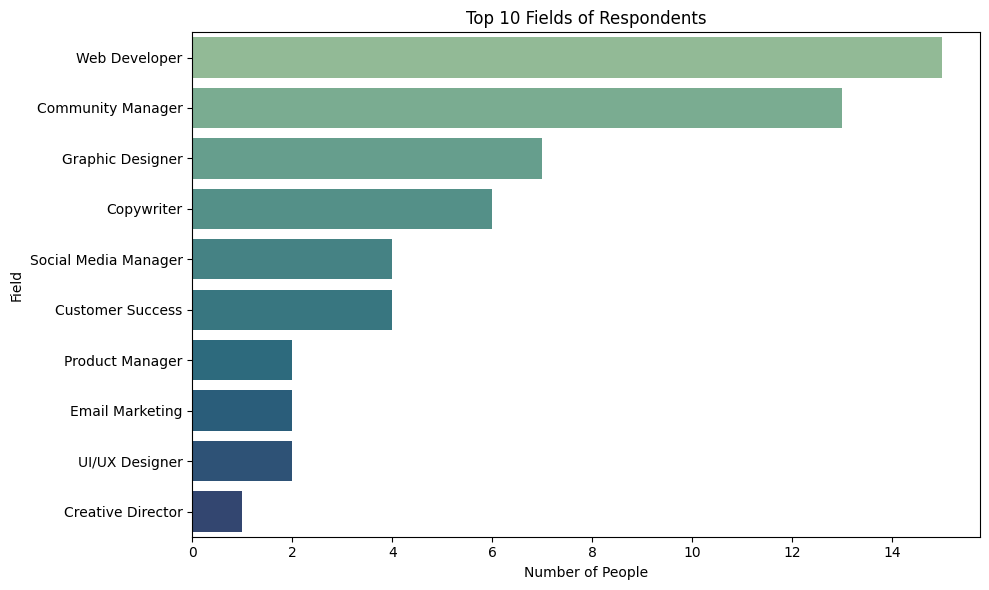

<Figure size 640x480 with 0 Axes>

In [13]:
# Convert to lowercase for uniformity
df_brand['Field'] = df_brand['Field'].astype(str).str.lower().str.strip()

# Map similar/ambiguous roles to standard categories
role_map = {
    'web developer': 'Web Developer',
    'ux/ui designer': 'UI/UX Designer',
    'ui/ux designer': 'UI/UX Designer',
    'graphic designer': 'Graphic Designer',
    'graphic design + web design: specifically landing page and sales page design': 'Graphic & Web Designer',
    'copywriter': 'Copywriter',
    'social media page managers': 'Social Media Manager',
    'community support manager': 'Community Manager',
    'community manager': 'Community Manager',
    'customer success manager': 'Customer Success',
    'email marketing specialist': 'Email Marketing',
    'product manager': 'Product Manager',
    'creative director': 'Creative Director',
    'operations and partnership manager': 'Ops & Partnerships',
    'automation engineering': 'Automation Engineer',
    '3d/ brand designer': '3D Designer',
    'advisor/advisory board member': 'Advisor',
    'interior designer': 'Interior Designer',
    'tech writer': 'Technical Writer',
    'sales/outreach personnel': 'Sales',
    'none': 'Unknown',
    'nan': 'Unknown',
    'mobile app developer': 'Mobile Developer',
    'ai specialist': 'AI Specialist',
    'community devrel': 'Community Manager',
    'pentesting': 'Cybersecurity',
    'data analyst': 'Data Analyst',
}

# Apply role mapping
df_brand['Field_Cleaned'] = df_brand['Field'].map(role_map).fillna('Other')

# Count occurrences
field_counts = df_brand['Field_Cleaned'].value_counts().reset_index()
field_counts.columns = ['Field', 'Count']

# Exclude "Other" from the counts
field_counts_no_other = field_counts[field_counts['Field'] != 'Other']

# Save counts (optional)
field_counts.to_excel('TDN_Field_Stats.xlsx', index=False)

# Visualize top fields
plt.figure(figsize=(10, 6))
sns.barplot(data=field_counts_no_other.head(10), x='Count', y='Field', palette='crest')
plt.title('Top 10 Fields of Respondents')
plt.xlabel('Number of People')
plt.ylabel('Field')
plt.tight_layout()
plt.show()
plt.savefig("images/top_fields.png", dpi=300)


- Top 10 Hard Skills

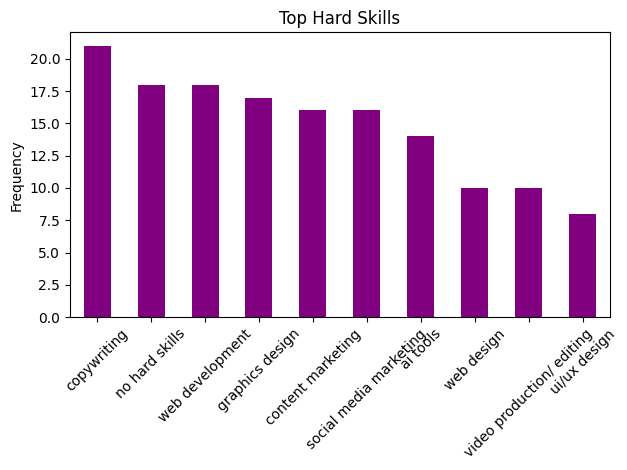

<Figure size 640x480 with 0 Axes>

In [14]:
from collections import Counter

def explode_column(col):
    all_skills = df_brand[col].dropna().str.split(',').sum()
    return pd.Series(Counter([skill.strip().lower() for skill in all_skills if skill]))

hard_skills_freq = explode_column('Hard_Skills').sort_values(ascending=False).head(10)

hard_skills_freq.plot(kind='bar', title='Top Hard Skills', color='purple')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("images/Top_Hard_Skills.png", dpi=300)

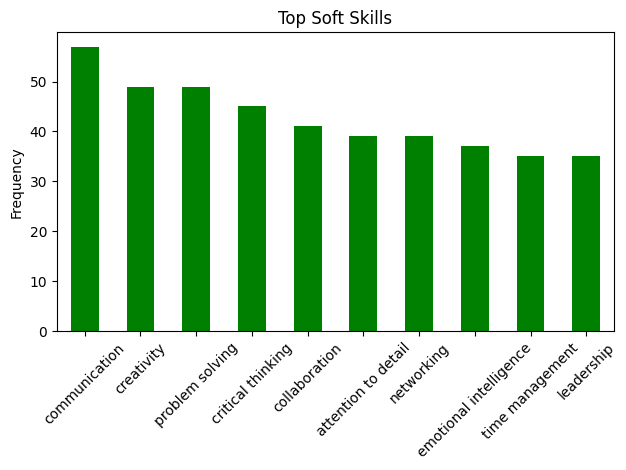

<Figure size 640x480 with 0 Axes>

In [15]:
soft_skills_freq = explode_column('Soft_Skills').sort_values(ascending=False).head(10)

soft_skills_freq.plot(kind='bar', title='Top Soft Skills', color='green')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("images/Top_Soft_Skills.png", dpi=300)

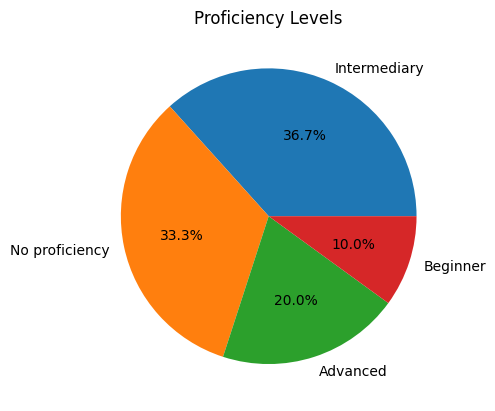

<Figure size 640x480 with 0 Axes>

In [16]:
df_brand['Proficiency'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Proficiency Levels")
plt.ylabel("")
plt.show()
plt.savefig("images/Proficiency_Levels.png", dpi=300)

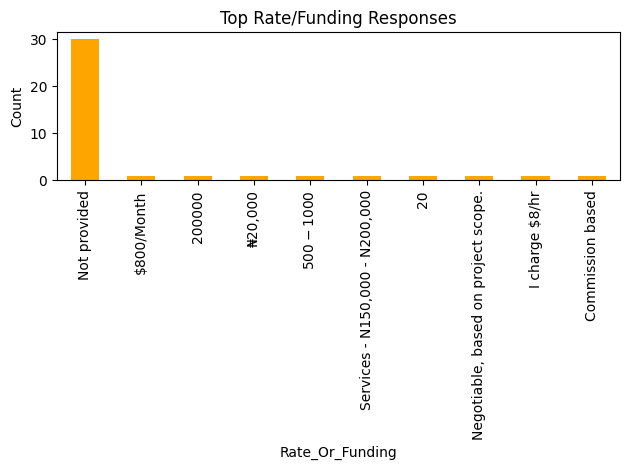

<Figure size 640x480 with 0 Axes>

In [20]:
df_brand['Rate_Or_Funding'].value_counts().head(10).plot(kind='bar', title='Top Rate/Funding Responses', color='orange')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig("images/Top_Rate_or_Funding_Responses.png", dpi=300)

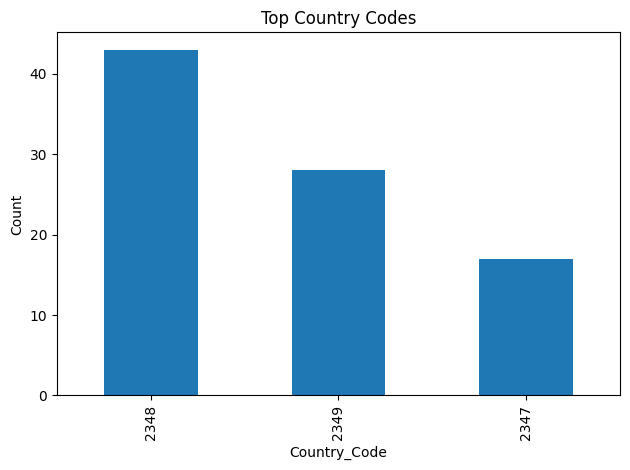

<Figure size 640x480 with 0 Axes>

In [21]:
df_brand['Country_Code'] = df_brand['Phone'].str.extract(r'^\+(\d{1,4})')
df_brand['Country_Code'].value_counts().head(10).plot(kind='bar', title='Top Country Codes')
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.savefig("images/Top_Country_Codes.png", dpi=300)

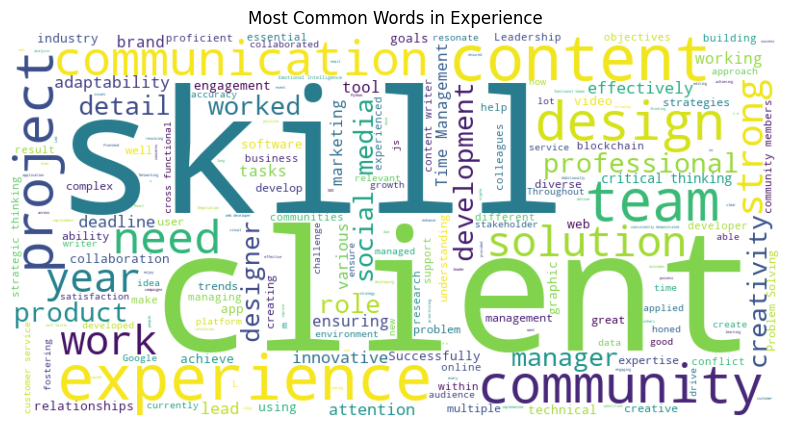

<Figure size 640x480 with 0 Axes>

In [22]:
from wordcloud import WordCloud

text = ' '.join(df_brand['Experience'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Experience")
plt.show()
plt.savefig("images/Most_Common_Words.png", dpi=300)